# Code for the Practical Work of the research

The imports for neccesary libraries for the code

In [1]:
import os
import cv2
import numpy as np
import PIL
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image



### The data is loaded to perform a visualization of it

In [2]:
directories = [d for d in os.listdir("C:\\Users\\Pablo\\Desktop\\Master Project\\data") 
               if os.path.isdir(os.path.join("C:\\Users\\Pablo\\Desktop\\Master Project\\data", d))]

directories

['0', '1', '2', '3', '4']

In [3]:
data_dir = 'C:\\Users\\Pablo\\Desktop\\Master Project\\data'

images0 = [fn for fn in os.listdir(f'{data_dir}\\0') if fn.endswith('.png')]
images1 = [fn for fn in os.listdir(f'{data_dir}\\1') if fn.endswith('.png')]
images2 = [fn for fn in os.listdir(f'{data_dir}\\2') if fn.endswith('.png')]
images3 = [fn for fn in os.listdir(f'{data_dir}\\3') if fn.endswith('.png')]
images4 = [fn for fn in os.listdir(f'{data_dir}\\4') if fn.endswith('.png')]

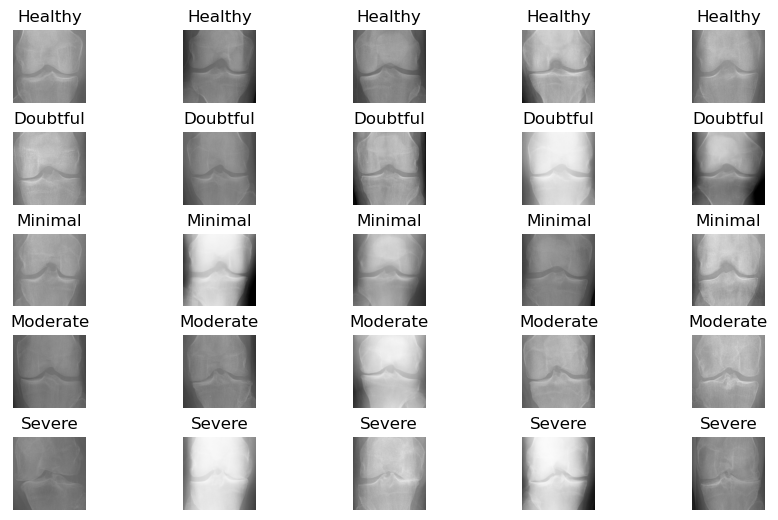

In [4]:
# randomly select 5 of each
select_0 = np.random.choice(images0, 5, replace = False)
select_1 = np.random.choice(images1, 5, replace = False)
select_2 = np.random.choice(images2, 5, replace = False)
select_3 = np.random.choice(images3, 5, replace = False)
select_4 = np.random.choice(images4, 5, replace = False)


# plotting 2 x 5 image matrix
fig = plt.figure(figsize = (10,6))
for i in range(25):
    if i < 5:
        fp = f'{data_dir}/0/{select_0[i]}'
        label = 'Healthy'
    elif i < 10:
        fp = f'{data_dir}/1/{select_1[i-5]}'
        label = 'Doubtful'
    elif i < 15:
        fp = f'{data_dir}/2/{select_2[i-10]}'
        label = 'Minimal'
    elif i < 20:
        fp = f'{data_dir}/3/{select_3[i-15]}'
        label = 'Moderate'
    else:
        fp = f'{data_dir}/4/{select_4[i-20]}'
        label = 'Severe'
        
        
    ax = fig.add_subplot(5, 5, i+1)
    
    # plot
    fn = image.load_img(fp, color_mode='rgb')
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()


In [5]:
# also check the number of files here
len(images0), len(images1), len(images2), len(images3), len(images4)

(3253, 1495, 2175, 1086, 251)

### Manual exploration of the dataset

In [6]:
aimages0 = np.array(images0)
aimages1 = np.array(images1)
aimages2 = np.array(images2)
aimages3 = np.array(images3)
aimages4 = np.array(images4)

In [7]:
aimages0.shape

(3253,)

In [8]:
aimages1.shape

(1495,)

In [9]:
aimages2.shape

(2175,)

In [10]:
aimages3.shape

(1086,)

In [11]:
aimages4.shape

(251,)

Code to view a specific image from the database, along with its details

In [12]:
f = f'C:/Users/Pablo/Desktop/Master Project/data/1/{aimages1[250]}' #change the number and array to change image grade

testing = Image.open(f)

print(testing)
print(testing.format)
print(testing.size)
print(testing.mode)

testing.show()

<PIL.PngImagePlugin.PngImageFile image mode=L size=224x224 at 0x19BBD8C8EE0>
PNG
(224, 224)
L


### Gather the image data along with its labels

In [13]:
labels = []
images = []

category = 0

for d in directories:
    label_dir = os.path.join(r"C:\Users\Pablo\Desktop\Master Project\data", d)
    file_names = [os.path.join(label_dir, f) for f in os.listdir(label_dir) if f.endswith(".png")]
    
    for f in file_names:
        img = cv2.imread(f, 1)
        
    
        images.append(img)
        labels.append(category)
            
    category += 1

In [14]:
#Check the numpy array with the images has all the images from the folders
images = np.array(images)
images.shape

(8260, 224, 224, 3)

In [15]:
#Check the numpy array with the labels corresponds to the quantity of images
labels = np.array(labels)
labels.shape

(8260,)

The code below is used to view a specific image

In [16]:
testing = Image.fromarray(images[0])

print(testing)
print(testing.format)
print(testing.size)
print(testing.mode)

testing.show()

<PIL.Image.Image image mode=RGB size=224x224 at 0x19BBD9BFCA0>
None
(224, 224)
RGB


## Train Test Val Split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.25, random_state=69)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.25, random_state=69)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(6195, 224, 224, 3)
(6195,)
(1548, 224, 224, 3)
(1548,)
(517, 224, 224, 3)
(517,)


In [18]:
from tensorflow.keras.utils import to_categorical


# normalize inputs from [0.0, 255.0] to end up with input in the range [0.0, 1.0]
X_trainN = np.array(X_train).astype('float32')
X_testN = np.array(X_test).astype('float32')
X_valN = np.array(X_val).astype('float32')
X_trainN /= 255.0
X_testN /= 255.0
X_valN /= 255.0

# one-hot encoding of the labels
y_trainN = np.array(y_train)
y_testN = np.array(y_test)
y_valN = np.array(y_val)
y_trainN = to_categorical(y_train)
y_testN = to_categorical(y_test)
y_valN = to_categorical(y_val)

In [19]:
print(y_trainN.shape) # this is the shape after one-hot encoding
print(y_testN.shape) # this is the shape after one-hot encoding
print(y_valN.shape) # this is the shape after one-hot encoding

(6195, 5)
(1548, 5)
(517, 5)


In [20]:
num_classes = y_trainN.shape[1]
print(num_classes)

5


## CNN Classification model

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='loss', patience=3)

seed = 1234
np.random.seed(seed)

In [22]:
epochs = 30  # >>> should be 25+
lr = 0.0001 # learning rate
optimizer = keras.optimizers.Adam(learning_rate=lr)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten

# Create the model
modelBase = Sequential()
modelBase.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu'))
modelBase.add(Dropout(0.2))
modelBase.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
modelBase.add(MaxPooling2D(pool_size=(2, 2)))
modelBase.add(Flatten())
modelBase.add(Dense(512, activation='relu'))
modelBase.add(Dropout(0.5))
modelBase.add(Dense(num_classes, activation='softmax')) # num_classes = 5

# Compile model



modelBase.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(modelBase.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 dropout (Dropout)           (None, 222, 222, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 387200)            0         
                                                                 
 dense (Dense)               (None, 512)               198246912 
                                                        

In [24]:
history_CNN = modelBase.fit(X_trainN, y_trainN, epochs=epochs, callbacks=callback, validation_data=(X_testN, y_testN), batch_size=64)

print(len(history_CNN.history['loss']))

Epoch 1/30
97/97 [==============================] - 300s 3s/step - loss: 2.3359 - accuracy: 0.3256 - val_loss: 1.4650 - val_accuracy: 0.3992
Epoch 2/30
97/97 [==============================] - 299s 3s/step - loss: 1.4510 - accuracy: 0.3585 - val_loss: 1.4556 - val_accuracy: 0.3992
Epoch 3/30
97/97 [==============================] - 293s 3s/step - loss: 1.4485 - accuracy: 0.3605 - val_loss: 1.4340 - val_accuracy: 0.3999
Epoch 4/30
97/97 [==============================] - 297s 3s/step - loss: 1.4465 - accuracy: 0.3748 - val_loss: 1.4313 - val_accuracy: 0.3992
Epoch 5/30
97/97 [==============================] - 299s 3s/step - loss: 1.4385 - accuracy: 0.3864 - val_loss: 1.4580 - val_accuracy: 0.3999
Epoch 6/30
97/97 [==============================] - 299s 3s/step - loss: 1.4325 - accuracy: 0.3837 - val_loss: 1.4402 - val_accuracy: 0.3992
Epoch 7/30
97/97 [==============================] - 297s 3s/step - loss: 1.4258 - accuracy: 0.3921 - val_loss: 1.4535 - val_accuracy: 0.3992
Epoch 8/30
97

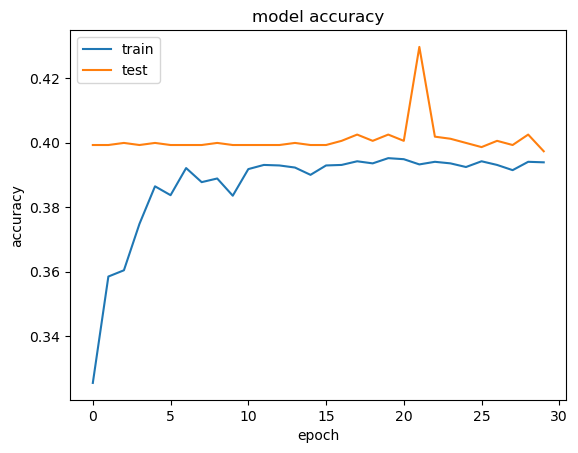

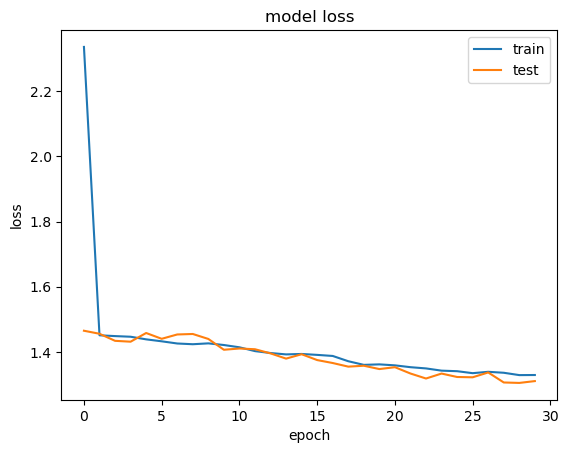

In [25]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history_CNN.history['accuracy'])
plt.plot(history_CNN.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_CNN.history['loss'])
plt.plot(history_CNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [26]:
from sklearn.metrics import classification_report

preds = modelBase.predict(X_testN)
print(preds.shape) # which means the predictions return in one-hot encoding format
preds = np.argmax(preds, axis=1)
print(preds.shape)
y_true = np.argmax(y_testN, axis=1)
print(y_testN.shape)
print(classification_report(y_true, preds, target_names=directories))

49/49 [==============================] - 13s 253ms/step
(1548, 5)
(1548,)
(1548, 5)
              precision    recall  f1-score   support

           0       0.40      0.97      0.57       618
           1       0.00      0.00      0.00       247
           2       0.34      0.03      0.06       416
           3       0.00      0.00      0.00       215
           4       0.00      0.00      0.00        52

    accuracy                           0.40      1548
   macro avg       0.15      0.20      0.13      1548
weighted avg       0.25      0.40      0.24      1548



C:\Users\Pablo\miniconda3\envs\KV7006\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pablo\miniconda3\envs\KV7006\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pablo\miniconda3\envs\KV7006\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
preds = modelBase.predict(X_valN)
print(preds.shape) # which means the predictions return in one-hot encoding format
preds = np.argmax(preds, axis=1)
print(preds.shape)
y_true = np.argmax(y_valN, axis=1)
print(y_val.shape)
print(classification_report(y_true, preds, target_names=directories))

17/17 [==============================] - 4s 233ms/step
(517, 5)
(517,)
(517,)
              precision    recall  f1-score   support

           0       0.39      0.97      0.56       200
           1       0.00      0.00      0.00        95
           2       0.33      0.04      0.07       143
           3       0.00      0.00      0.00        62
           4       0.00      0.00      0.00        17

    accuracy                           0.39       517
   macro avg       0.14      0.20      0.13       517
weighted avg       0.24      0.39      0.24       517



C:\Users\Pablo\miniconda3\envs\KV7006\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pablo\miniconda3\envs\KV7006\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pablo\miniconda3\envs\KV7006\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 12s 242ms/step


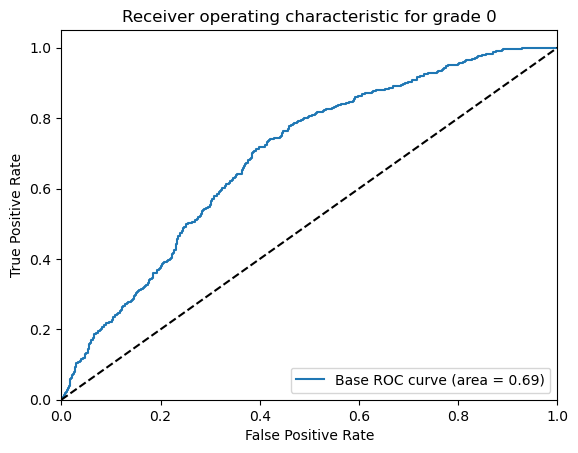

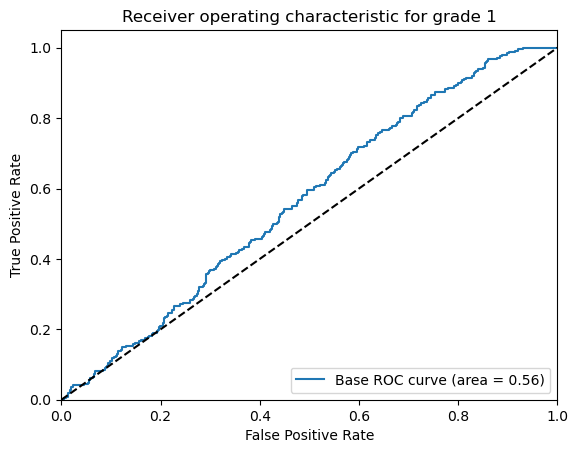

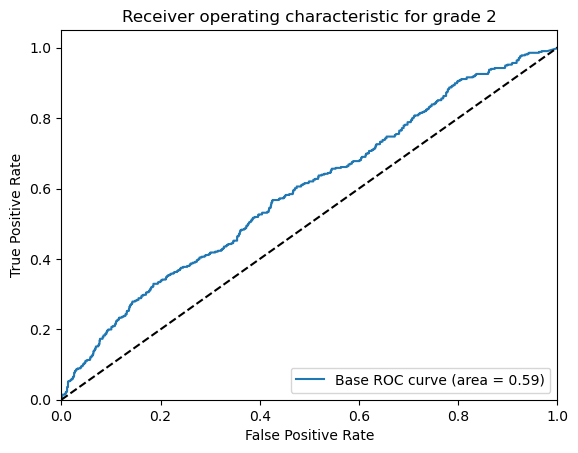

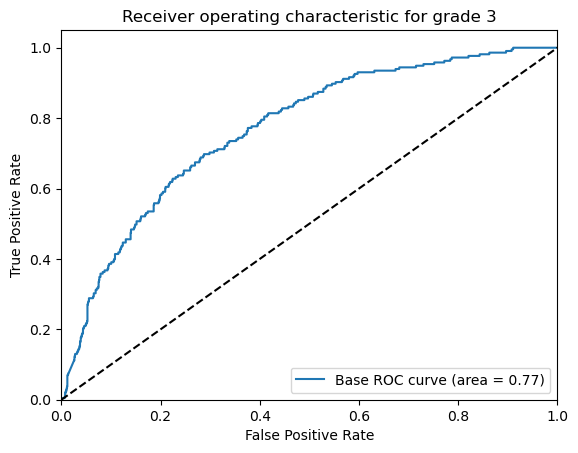

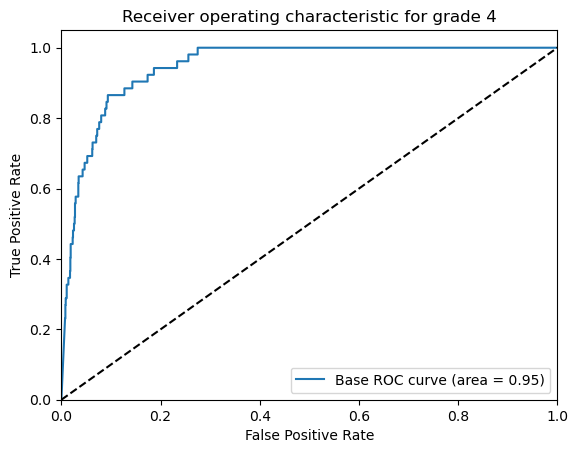

In [28]:
from sklearn.metrics import roc_curve, auc

y_score = modelBase.predict(X_testN) # get the prediction probabilities

fpr = dict()
tpr = dict()
roc_auc = dict()
class_number = 0

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_testN[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    
title = 'Receiver operating characteristic curve for Parasitized data in the test split'
# Plot of a ROC curve for a specific class
for i in range(num_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='Base ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic for grade {class_number}')
    title = 'Receiver operating characteristic curve for Uninfected data in the test split'
    plt.legend(loc="lower right")
    plt.show()
    class_number = class_number + 1 

### Code to use the database with Sklearn models

In [29]:
#sklearn expects i/p to be 2d array-model.fit(x_train,y_train)=>reshape to 2d array
nsamples, nx, ny, nrgb = X_train.shape
x_train2 = X_train.reshape((nsamples,nx*ny*nrgb))

In [30]:
#so,eventually,model.predict() should also be a 2d input
nsamples, nx, ny, nrgb = X_test.shape
x_test2 = X_test.reshape((nsamples,nx*ny*nrgb))

In [31]:
#so,eventually,model.predict() should also be a 2d input
nsamples, nx, ny, nrgb = X_val.shape
x_val2 = X_val.reshape((nsamples,nx*ny*nrgb))

## Randon Forest Classification Model

In [32]:
from sklearn.ensemble import RandomForestClassifier

model_Forest = RandomForestClassifier()

In [33]:
model_Forest.fit(x_train2,y_train)

RandomForestClassifier()

In [34]:
y_pred=model_Forest.predict(x_test2)
y_pred

array([0, 0, 0, ..., 2, 0, 0])

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.43863049095607237
              precision    recall  f1-score   support

           0       0.83      0.48      0.61      1070
           1       0.02      0.18      0.04        33
           2       0.33      0.36      0.34       378
           3       0.12      0.37      0.18        67
           4       0.00      0.00      0.00         0

    accuracy                           0.44      1548
   macro avg       0.26      0.28      0.23      1548
weighted avg       0.66      0.44      0.51      1548



C:\Users\Pablo\miniconda3\envs\KV7006\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pablo\miniconda3\envs\KV7006\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pablo\miniconda3\envs\KV7006\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
y_pred=model_Forest.predict(x_val2)
y_pred

array([2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 3, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 2, 0, 0, 3, 0, 0, 2, 0, 3, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 3, 0, 2, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 3, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 3, 0, 2, 0, 0, 2,
       2, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [37]:
print(accuracy_score(y_pred,y_val))
print(classification_report(y_pred,y_val))

0.43133462282398455
              precision    recall  f1-score   support

           0       0.85      0.47      0.61       365
           1       0.01      0.07      0.02        14
           2       0.34      0.39      0.36       122
           3       0.05      0.19      0.08        16
           4       0.00      0.00      0.00         0

    accuracy                           0.43       517
   macro avg       0.25      0.22      0.21       517
weighted avg       0.68      0.43      0.52       517



C:\Users\Pablo\miniconda3\envs\KV7006\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pablo\miniconda3\envs\KV7006\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pablo\miniconda3\envs\KV7006\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Naïve Bayes Classification Model

In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
NB_model = GaussianNB()

In [40]:
NB_model.fit(x_train2,y_train)

GaussianNB()

In [41]:
y_pred_nb=NB_model.predict(x_test2)

In [42]:
print(accuracy_score(y_pred_nb,y_test))
print(classification_report(y_pred_nb,y_test))

0.22545219638242894
              precision    recall  f1-score   support

           0       0.32      0.45      0.37       435
           1       0.38      0.17      0.24       546
           2       0.07      0.39      0.11        72
           3       0.02      0.31      0.04        16
           4       0.48      0.05      0.09       479

    accuracy                           0.23      1548
   macro avg       0.25      0.28      0.17      1548
weighted avg       0.38      0.23      0.22      1548



In [43]:
y_pred_nb=NB_model.predict(x_val2)

In [44]:
print(accuracy_score(y_pred_nb,y_val))
print(classification_report(y_pred_nb,y_val))

0.21663442940038685
              precision    recall  f1-score   support

           0       0.29      0.44      0.35       134
           1       0.36      0.19      0.25       180
           2       0.07      0.28      0.11        36
           3       0.02      0.25      0.03         4
           4       0.47      0.05      0.09       163

    accuracy                           0.22       517
   macro avg       0.24      0.24      0.17       517
weighted avg       0.35      0.22      0.21       517



## Data preparation with pre-processing

In [46]:
labels = []
images = []

category = 0

for d in directories:
    label_dir = os.path.join(r"C:\Users\Pablo\Desktop\Master Project\data", d)
    file_names = [os.path.join(label_dir, f) for f in os.listdir(label_dir) if f.endswith(".png")]
    
    for f in file_names:
        img = cv2.imread(f, 1)                                               # Read the image
        
        grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)                      # Turn the image to Gray Scale
        
        
        equalimg = cv2.equalizeHist(grayimg)                                # Histogram Equalization
        
        
        quanimg = np.zeros((224, 224,), np.uint(8))                          # Quantization
        quanimg = np.uint8(equalimg/32) * 32
        
        
        normimg = np.zeros((800,800))                                        # Intensity Normalization
        normimg = cv2.normalize(quanimg,  normimg, 0, 255, cv2.NORM_MINMAX)
        
        final = cv2.cvtColor(normimg,cv2.COLOR_GRAY2RGB)
    
        images.append(final)
        labels.append(category)
            
    category += 1

In [47]:
#Check the numpy array with the images has all the images from the folders
images = np.array(images)
images.shape

(8260, 224, 224, 3)

In [48]:
#Check the numpy array with the labels corresponds to the quantity of images
labels = np.array(labels)
labels.shape

(8260,)

Code to view a single image after pre-processing

In [49]:
testing = Image.fromarray(images[224])

print(testing)
print(testing.format)
print(testing.size)
print(testing.mode)

testing.show()

<PIL.Image.Image image mode=RGB size=224x224 at 0x19C897B4160>
None
(224, 224)
RGB


## Train Test Val Split with pre-processed data

In [50]:
from sklearn.model_selection import train_test_split

X_trainP, X_testP, y_trainP, y_testP = train_test_split(images, labels, test_size=0.25, random_state=69)

X_testP, X_valP, y_testP, y_valP = train_test_split(X_testP, y_testP, test_size=0.25, random_state=69)

print(X_trainP.shape)
print(y_trainP.shape)
print(X_testP.shape)
print(y_testP.shape)
print(X_valP.shape)
print(y_valP.shape)

(6195, 224, 224, 3)
(6195,)
(1548, 224, 224, 3)
(1548,)
(517, 224, 224, 3)
(517,)


One-hot encoding for the CNN

In [51]:
from tensorflow.keras.utils import to_categorical


# normalize inputs from [0.0, 255.0] to end up with input in the range [0.0, 1.0]
X_trainNP = np.array(X_train).astype('float32')
X_testNP = np.array(X_test).astype('float32')
X_valNP = np.array(X_val).astype('float32')
X_trainNP /= 255.0
X_testNP /= 255.0
X_valNP /= 255.0

# one-hot encoding of the labels
y_trainNP = np.array(y_train)
y_testNP = np.array(y_test)
y_valNP = np.array(y_val)
y_trainNP = to_categorical(y_train)
y_testNP = to_categorical(y_test)
y_valNP = to_categorical(y_val)

In [52]:
print(y_trainNP.shape) # this is the shape after one-hot encoding
print(y_testNP.shape) # this is the shape after one-hot encoding
print(y_valNP.shape) # this is the shape after one-hot encoding

(6195, 5)
(1548, 5)
(517, 5)


In [53]:
num_classes = y_trainN.shape[1]
print(num_classes)

5


## CNN Classification model Pre-Processed

In [54]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='loss', patience=3)

seed = 1234
np.random.seed(seed)

In [55]:
epochs = 30  # >>> should be 25+
lr = 0.0001 # learning rate
optimizer = keras.optimizers.Adam(learning_rate=lr)

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten

# Create the model
modelBaseP = Sequential()
modelBaseP.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu'))
modelBaseP.add(Dropout(0.2))
modelBaseP.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
modelBaseP.add(MaxPooling2D(pool_size=(2, 2)))
modelBaseP.add(Flatten())
modelBaseP.add(Dense(512, activation='relu'))
modelBaseP.add(Dropout(0.5))
modelBaseP.add(Dense(num_classes, activation='softmax')) # num_classes = 5

# Compile model



modelBaseP.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(modelBaseP.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 dropout_2 (Dropout)         (None, 222, 222, 32)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 387200)            0         
                                                                 
 dense_2 (Dense)             (None, 512)               198246912 
                                                      

In [57]:
history_CNNP = modelBaseP.fit(X_trainNP, y_trainNP, epochs=epochs, callbacks=callback, validation_data=(X_testNP, y_testNP), batch_size=64)

print(len(history_CNNP.history['loss']))

Epoch 1/30
97/97 [==============================] - 285s 3s/step - loss: 2.5248 - accuracy: 0.3245 - val_loss: 1.4878 - val_accuracy: 0.3992
Epoch 2/30
97/97 [==============================] - 286s 3s/step - loss: 1.4769 - accuracy: 0.3561 - val_loss: 1.4813 - val_accuracy: 0.3992
Epoch 3/30
97/97 [==============================] - 311s 3s/step - loss: 1.4726 - accuracy: 0.3931 - val_loss: 1.4443 - val_accuracy: 0.3992
Epoch 4/30
97/97 [==============================] - 300s 3s/step - loss: 1.4694 - accuracy: 0.3931 - val_loss: 1.4830 - val_accuracy: 0.3992
Epoch 5/30
97/97 [==============================] - 317s 3s/step - loss: 1.4682 - accuracy: 0.3931 - val_loss: 1.4445 - val_accuracy: 0.3992
Epoch 6/30
97/97 [==============================] - 310s 3s/step - loss: 1.4607 - accuracy: 0.3931 - val_loss: 1.4471 - val_accuracy: 0.3992
Epoch 7/30
97/97 [==============================] - 298s 3s/step - loss: 1.4575 - accuracy: 0.3931 - val_loss: 1.4564 - val_accuracy: 0.3992
Epoch 8/30
97

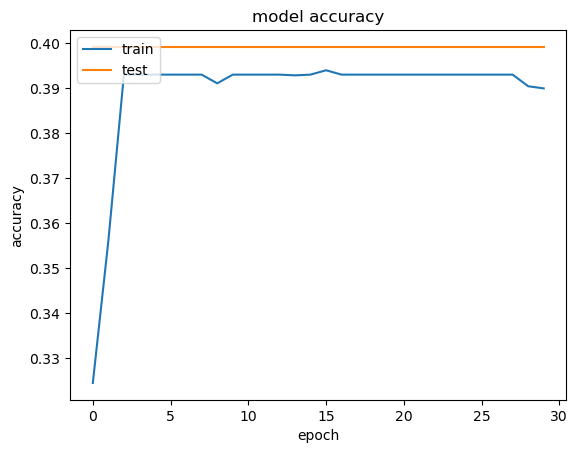

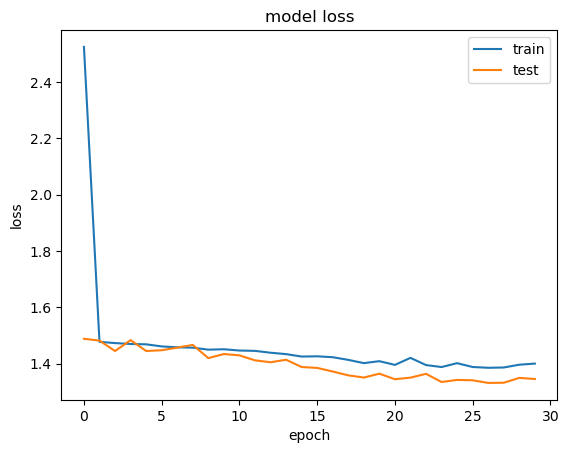

In [58]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history_CNNP.history['accuracy'])
plt.plot(history_CNNP.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_CNNP.history['loss'])
plt.plot(history_CNNP.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [59]:
from sklearn.metrics import classification_report

preds = modelBaseP.predict(X_testNP)
print(preds.shape) # which means the predictions return in one-hot encoding format
preds = np.argmax(preds, axis=1)
print(preds.shape)
y_true = np.argmax(y_testNP, axis=1)
print(y_testNP.shape)
print(classification_report(y_true, preds, target_names=directories))

49/49 [==============================] - 13s 270ms/step
(1548, 5)
(1548,)
(1548, 5)
              precision    recall  f1-score   support

           0       0.40      1.00      0.57       618
           1       0.00      0.00      0.00       247
           2       0.00      0.00      0.00       416
           3       0.00      0.00      0.00       215
           4       0.00      0.00      0.00        52

    accuracy                           0.40      1548
   macro avg       0.08      0.20      0.11      1548
weighted avg       0.16      0.40      0.23      1548



C:\Users\Pablo\miniconda3\envs\KV7006\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pablo\miniconda3\envs\KV7006\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pablo\miniconda3\envs\KV7006\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
preds = modelBaseP.predict(X_valNP)
print(preds.shape) # which means the predictions return in one-hot encoding format
preds = np.argmax(preds, axis=1)
print(preds.shape)
y_true = np.argmax(y_valNP, axis=1)
print(y_valNP.shape)
print(classification_report(y_true, preds, target_names=directories))

17/17 [==============================] - 4s 249ms/step
(517, 5)
(517,)
(517, 5)
              precision    recall  f1-score   support

           0       0.39      1.00      0.56       200
           1       0.00      0.00      0.00        95
           2       0.00      0.00      0.00       143
           3       0.00      0.00      0.00        62
           4       0.00      0.00      0.00        17

    accuracy                           0.39       517
   macro avg       0.08      0.20      0.11       517
weighted avg       0.15      0.39      0.22       517



C:\Users\Pablo\miniconda3\envs\KV7006\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pablo\miniconda3\envs\KV7006\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pablo\miniconda3\envs\KV7006\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 12s 242ms/step


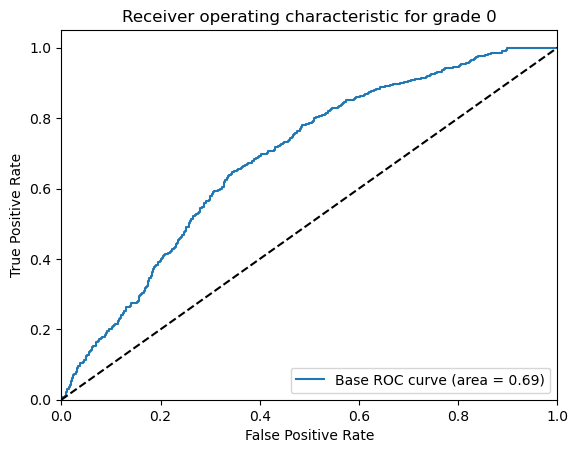

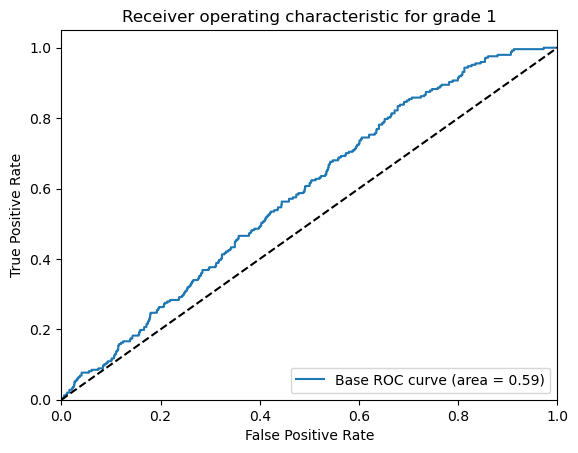

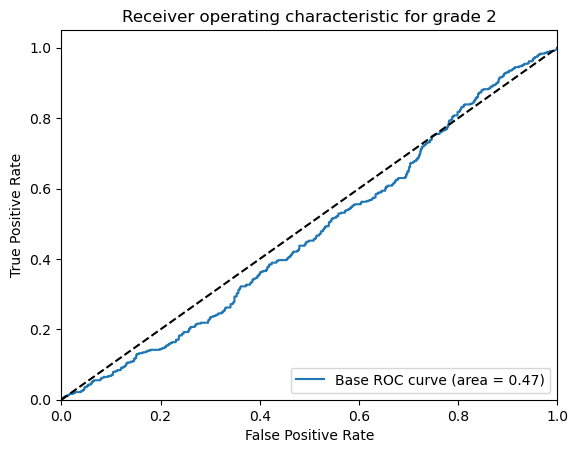

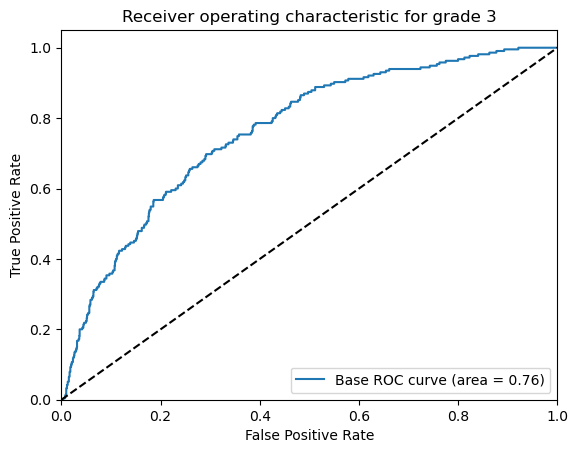

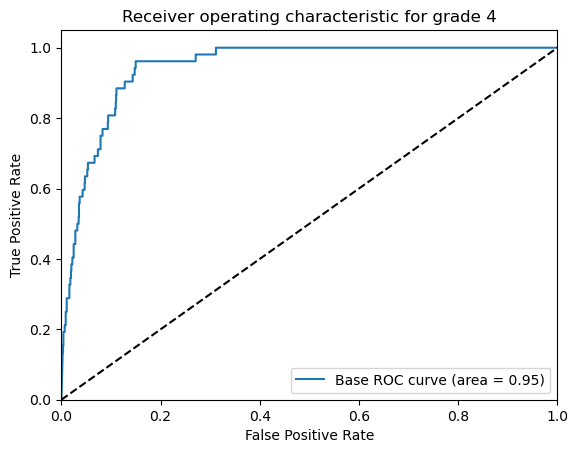

In [61]:
from sklearn.metrics import roc_curve, auc

y_score = modelBaseP.predict(X_testNP) # get the prediction probabilities

fpr = dict()
tpr = dict()
roc_auc = dict()
class_number = 0

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_testNP[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    
title = 'Receiver operating characteristic curve for Parasitized data in the test split'
# Plot of a ROC curve for a specific class
for i in range(num_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='Base ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic for grade {class_number}')
    title = 'Receiver operating characteristic curve for Uninfected data in the test split'
    plt.legend(loc="lower right")
    plt.show()
    class_number = class_number + 1 

In [62]:
#sklearn expects i/p to be 2d array-model.fit(x_train,y_train)=>reshape to 2d array
nsamples, nx, ny, nrgb = X_trainP.shape
x_train2P = X_trainP.reshape((nsamples,nx*ny*nrgb))

In [63]:
#so,eventually,model.predict() should also be a 2d input
nsamples, nx, ny, nrgb = X_testP.shape
x_test2P = X_testP.reshape((nsamples,nx*ny*nrgb))

In [64]:
#so,eventually,model.predict() should also be a 2d input
nsamples, nx, ny, nrgb = X_valP.shape
x_val2P = X_valP.reshape((nsamples,nx*ny*nrgb))

## Random Forest Pre-Processed

In [65]:
from sklearn.ensemble import RandomForestClassifier

model_Forest = RandomForestClassifier()

In [66]:
model_Forest.fit(x_train2P,y_trainP)

RandomForestClassifier()

In [67]:
y_pred=model_Forest.predict(x_test2P)

In [68]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print(accuracy_score(y_pred,y_testP))
print(classification_report(y_pred,y_testP))

0.4599483204134367
              precision    recall  f1-score   support

           0       0.85      0.50      0.63      1057
           1       0.01      0.10      0.01        21
           2       0.34      0.39      0.37       366
           3       0.17      0.37      0.24        99
           4       0.06      0.60      0.11         5

    accuracy                           0.46      1548
   macro avg       0.29      0.39      0.27      1548
weighted avg       0.67      0.46      0.53      1548



In [69]:
y_pred=model_Forest.predict(x_val2P)

In [70]:
print(accuracy_score(y_pred,y_valP))
print(classification_report(y_pred,y_valP))

0.45454545454545453
              precision    recall  f1-score   support

           0       0.85      0.47      0.61       365
           1       0.02      0.50      0.04         4
           2       0.36      0.42      0.39       120
           3       0.18      0.39      0.24        28
           4       0.00      0.00      0.00         0

    accuracy                           0.45       517
   macro avg       0.28      0.36      0.26       517
weighted avg       0.70      0.45      0.53       517



C:\Users\Pablo\miniconda3\envs\KV7006\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pablo\miniconda3\envs\KV7006\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pablo\miniconda3\envs\KV7006\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Naïve Bayes Pre-Processed

In [71]:
from sklearn.naive_bayes import GaussianNB

In [72]:
NB_model = GaussianNB()

In [73]:
NB_model.fit(x_train2P,y_trainP)

GaussianNB()

In [74]:
y_pred_nb=NB_model.predict(x_test2P)

In [75]:
print(accuracy_score(y_pred_nb,y_testP))
print(classification_report(y_pred_nb,y_testP))

0.1937984496124031
              precision    recall  f1-score   support

           0       0.04      0.49      0.07        47
           1       0.80      0.18      0.30      1087
           2       0.07      0.44      0.12        68
           3       0.10      0.21      0.13        98
           4       0.54      0.11      0.19       248

    accuracy                           0.19      1548
   macro avg       0.31      0.29      0.16      1548
weighted avg       0.66      0.19      0.25      1548



In [76]:
y_pred_nb=NB_model.predict(x_val2P)

In [77]:
print(accuracy_score(y_pred_nb,y_valP))
print(classification_report(y_pred_nb,y_valP))

0.20696324951644102
              precision    recall  f1-score   support

           0       0.04      0.78      0.07         9
           1       0.82      0.21      0.33       372
           2       0.08      0.44      0.13        25
           3       0.08      0.14      0.10        37
           4       0.35      0.08      0.13        74

    accuracy                           0.21       517
   macro avg       0.27      0.33      0.15       517
weighted avg       0.65      0.21      0.27       517

